## Encoding

## Low-N

In [ ]:
import numpy as np
import multiprocessing as mp
from hybrid_model import Hybrid_Model

n_cores=6

study=Hybrid_Model('RL401_YEAST_Bolon2013_wt_encoded.npy','RL401_YEAST_Bolon2013_encoded.csv')

train_sizes_shuffled=study._get_train_sizes()
np.random.shuffle(train_sizes_shuffled)

if train_sizes_shuffled.size < n_cores:
    n_cores=train_sizes_shuffled.size

manager=mp.Manager()
data=manager.list()

processes=[]
for train_sizes in np.array_split(train_sizes_shuffled,n_cores):
    p=mp.Process(target=study.run, args=[train_sizes,data])
    p.start()
    processes.append(p)

for p in processes:
    p.join()

data=np.array(data,dtype=object)
data=np.concatenate(data,axis=1)
np.save('RL401_YEAST_Bolon2013_hybrid_model_data.npy',data)

## Visualize Results

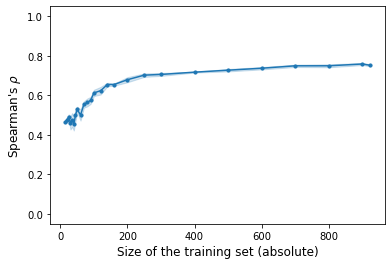

In [21]:
import matplotlib.pyplot as plt

def sort_and_analyze(
    x:np.ndarray,
    arg:np.ndarray,
    n_runs=10
    ) -> tuple:

    x=x[arg]
    x=np.split(x,int(x.size/n_runs))
    x=np.vstack(x)    
    return (np.mean(x,axis=1),np.std(x,axis=1,ddof=1,dtype=float)/np.sqrt(x.shape[1]))

data=np.load('RL401_YEAST_Bolon2013_hybrid_model_data.npy',allow_pickle=True)

spearmanrs,_,_,_,training_sizes,testing_sizes=data
arg=np.argsort(training_sizes)
x_training,_=sort_and_analyze(training_sizes,arg)
x_testing,_=sort_and_analyze(testing_sizes,arg)

srs_mean,srs_sem=sort_and_analyze(spearmanrs,arg)

x_training=np.array(x_training,dtype=int)
x_testing=np.array(x_testing,dtype=int)

srs_mean=np.array(srs_mean,dtype=float)
srs_sem=np.array(srs_sem,dtype=float)

clr='C0'
fig,ax=plt.subplots()

ax.scatter(x_training,srs_mean,color=clr,s=10)
ax.plot(x_training,srs_mean,color=clr)
ax.fill_between(x_training,srs_mean+srs_sem,srs_mean-srs_sem, alpha=0.2,color='C0')
ax.set_ylim(-0.05,1.05)

ax.set_xlabel('Size of the training set (absolute)',size=12)
ax.set_ylabel(r"Spearman's $\rho$",size=12)

plt.show()

In [24]:
srs_mean

array([0.46721864, 0.47741737, 0.4894432 , 0.46038745, 0.47555687,
       0.45317401, 0.49911854, 0.52907323, 0.50032066, 0.55361624,
       0.56385418, 0.57418161, 0.61227592, 0.62338354, 0.65448017,
       0.65446465, 0.67907967, 0.70203525, 0.70562911, 0.71716813,
       0.72713237, 0.73702741, 0.74924287, 0.74934764, 0.75838283,
       0.75229811])